# MLB Digital Engagement - Analysis

https://www.mlb.com/glossary

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
# Show all Row & Columns

#pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999

In [4]:
#pip install shap

  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\marram\\Anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [1]:
# Import Libs
import numpy as np
import pandas as pd
import seaborn as sns
import time
from time import *
from time import time
np.random.seed(42)
import pyodbc
import datetime
import calendar

# ML Model Imports
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, VotingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVR
from lightgbm import LGBMRegressor, LGBMModel, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
import xgboost as xgb

# Tools Import
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, f_regression, mutual_info_regression

# Metrics Import
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score, mean_squared_error
from sklearn.metrics import classification_report,roc_curve, auc,precision_score,f1_score,accuracy_score,roc_auc_score,confusion_matrix, RocCurveDisplay
import shap

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Plot format standardization

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Load Data

In [3]:
df = pd.read_pickle('MLBEngagementData2021NonPitchers.pkl')
df

,playerId,playerName_x,playerName_x,dailyDataDate,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,...,engagementMetricsDate,target1,target2,target3,target4,numberOfFollowers,pre_season,all_star_game,regular_season,post_season
17,666163,Ben Rortvedt,NaN,20210430.0,1.0,1.0,0.0,1.0,0.0,0.0,...,2021-05-01,1.216004,5.488800,0.657555,3.232047,NaN,0,0,1,0
18,613564,Jason Vosler,NaN,20210424.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2021-04-25,1.479820,9.215017,5.959181,3.869677,NaN,0,0,1,0
19,613564,Jason Vosler,NaN,20210425.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2021-04-26,2.391698,2.677821,2.006855,3.015009,NaN,0,0,1,0
20,613564,Jason Vosler,NaN,20210426.0,1.0,1.0,0.0,2.0,0.0,0.0,...,2021-04-27,4.078845,4.898914,0.206044,2.071601,NaN,0,0,1,0
21,613564,Jason Vosler,NaN,20210427.0,1.0,0.0,1.0,0.0,1.0,0.0,...,2021-04-28,3.591404,1.822437,0.091351,1.104625,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100192,666801,Rodolfo Castro,NaN,20210421.0,1.0,0.0,2.0,0.0,0.0,0.0,...,2021-04-22,0.014543,3.599019,0.018198,0.755064,NaN,0,0,1,0
100194,672695,Geraldo Perdomo,NaN,20210403.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2021-04-04,1.264989,6.407224,1.281305,0.186374,NaN,0,0,1,0
100195,672695,Geraldo Perdomo,NaN,20210404.0,1.0,1.0,2.0,0.0,0.0,0.0,...,2021-04-05,0.464332,2.019461,0.141061,0.129661,NaN,0,0,1,0
100196,672695,Geraldo Perdomo,NaN,20210406.0,1.0,0.0,3.0,1.0,0.0,0.0,...,2021-04-07,0.551493,4.623298,0.361535,0.463519,NaN,0,0,1,0


### Data Cleaning & Feature Engineering

In [4]:
# Replace NULLs in numberOfFollowers with 0's

df[['numberOfFollowers']] = df[['numberOfFollowers']].fillna(0)

In [5]:
df

,playerId,playerName_x,playerName_x,dailyDataDate,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,...,engagementMetricsDate,target1,target2,target3,target4,numberOfFollowers,pre_season,all_star_game,regular_season,post_season
17,666163,Ben Rortvedt,NaN,20210430.0,1.0,1.0,0.0,1.0,0.0,0.0,...,2021-05-01,1.216004,5.488800,0.657555,3.232047,0.0,0,0,1,0
18,613564,Jason Vosler,NaN,20210424.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2021-04-25,1.479820,9.215017,5.959181,3.869677,0.0,0,0,1,0
19,613564,Jason Vosler,NaN,20210425.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2021-04-26,2.391698,2.677821,2.006855,3.015009,0.0,0,0,1,0
20,613564,Jason Vosler,NaN,20210426.0,1.0,1.0,0.0,2.0,0.0,0.0,...,2021-04-27,4.078845,4.898914,0.206044,2.071601,0.0,0,0,1,0
21,613564,Jason Vosler,NaN,20210427.0,1.0,0.0,1.0,0.0,1.0,0.0,...,2021-04-28,3.591404,1.822437,0.091351,1.104625,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100192,666801,Rodolfo Castro,NaN,20210421.0,1.0,0.0,2.0,0.0,0.0,0.0,...,2021-04-22,0.014543,3.599019,0.018198,0.755064,0.0,0,0,1,0
100194,672695,Geraldo Perdomo,NaN,20210403.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2021-04-04,1.264989,6.407224,1.281305,0.186374,0.0,0,0,1,0
100195,672695,Geraldo Perdomo,NaN,20210404.0,1.0,1.0,2.0,0.0,0.0,0.0,...,2021-04-05,0.464332,2.019461,0.141061,0.129661,0.0,0,0,1,0
100196,672695,Geraldo Perdomo,NaN,20210406.0,1.0,0.0,3.0,1.0,0.0,0.0,...,2021-04-07,0.551493,4.623298,0.361535,0.463519,0.0,0,0,1,0


In [6]:
# Add binary column if the player recieved an award

df[['awardachieved']] = df[['awardId']].notnull().astype(int)

In [7]:
# Change Major Market ID to binary

df[['majormarket']] = df[['majormarket']].astype(int)

In [8]:
df

,playerId,playerName_x,playerName_x,dailyDataDate,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,...,target1,target2,target3,target4,numberOfFollowers,pre_season,all_star_game,regular_season,post_season,awardachieved
17,666163,Ben Rortvedt,NaN,20210430.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.216004,5.488800,0.657555,3.232047,0.0,0,0,1,0,0
18,613564,Jason Vosler,NaN,20210424.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.479820,9.215017,5.959181,3.869677,0.0,0,0,1,0,0
19,613564,Jason Vosler,NaN,20210425.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2.391698,2.677821,2.006855,3.015009,0.0,0,0,1,0,0
20,613564,Jason Vosler,NaN,20210426.0,1.0,1.0,0.0,2.0,0.0,0.0,...,4.078845,4.898914,0.206044,2.071601,0.0,0,0,1,0,0
21,613564,Jason Vosler,NaN,20210427.0,1.0,0.0,1.0,0.0,1.0,0.0,...,3.591404,1.822437,0.091351,1.104625,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100192,666801,Rodolfo Castro,NaN,20210421.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.014543,3.599019,0.018198,0.755064,0.0,0,0,1,0,0
100194,672695,Geraldo Perdomo,NaN,20210403.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.264989,6.407224,1.281305,0.186374,0.0,0,0,1,0,0
100195,672695,Geraldo Perdomo,NaN,20210404.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.464332,2.019461,0.141061,0.129661,0.0,0,0,1,0,0
100196,672695,Geraldo Perdomo,NaN,20210406.0,1.0,0.0,3.0,1.0,0.0,0.0,...,0.551493,4.623298,0.361535,0.463519,0.0,0,0,1,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100099 entries, 17 to 100197
Data columns (total 50 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   playerId               100099 non-null  int64  
 1   playerName_x           100099 non-null  object 
 2   playerName_x           291 non-null     object 
 3   dailyDataDate          100099 non-null  float64
 4   gamesPlayedBatting     100099 non-null  float32
 5   flyOuts                100099 non-null  float32
 6   groundOuts             100099 non-null  float32
 7   runsScored             100099 non-null  float32
 8   doubles                100099 non-null  float32
 9   triples                100099 non-null  float32
 10  homeRuns               100099 non-null  float32
 11  strikeOuts             100099 non-null  float32
 12  baseOnBalls            100099 non-null  float32
 13  intentionalWalks       100099 non-null  float32
 14  hits                   100099 non-n

In [10]:
df['Batting_Average_on_Balls_in_Play_BABIP'] = (df['hits']-df['homeRuns']) / (df['atBats']-df['strikeOuts']-df['homeRuns']+df['sacFlies'])
df['Batting_Average_on_Balls_in_Play_BABIP'] = df['Batting_Average_on_Balls_in_Play_BABIP'].replace(np.nan, 0)

In [11]:
df['Isolated_Power_ISO'] = ((1*df['doubles']) + (2*df['triples']) + (3*df['homeRuns'])) / (df['atBats'])
df['Isolated_Power_ISO'] = df['Isolated_Power_ISO'].replace(np.nan, 0)

In [12]:
df['Runs_Created_RC'] = df['totalBases'] * (df['hits']+df['baseOnBalls']+df['intentionalWalks']) / (df['atBats']+df['baseOnBalls']+df['intentionalWalks'])
df['Isolated_Power_ISO'] = df['Isolated_Power_ISO'].replace(np.nan, 0)

In [13]:
df

,playerId,playerName_x,playerName_x,dailyDataDate,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,...,target4,numberOfFollowers,pre_season,all_star_game,regular_season,post_season,awardachieved,Batting_Average_on_Balls_in_Play_BABIP,Isolated_Power_ISO,Runs_Created_RC
17,666163,Ben Rortvedt,NaN,20210430.0,1.0,1.0,0.0,1.0,0.0,0.0,...,3.232047,0.0,0,0,1,0,0,0.500000,0.0,0.500000
18,613564,Jason Vosler,NaN,20210424.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.869677,0.0,0,0,1,0,0,0.000000,0.0,0.000000
19,613564,Jason Vosler,NaN,20210425.0,1.0,1.0,0.0,0.0,0.0,0.0,...,3.015009,0.0,0,0,1,0,0,0.333333,0.0,0.333333
20,613564,Jason Vosler,NaN,20210426.0,1.0,1.0,0.0,2.0,0.0,0.0,...,2.071601,0.0,0,0,1,0,0,0.000000,0.0,0.000000
21,613564,Jason Vosler,NaN,20210427.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.104625,0.0,0,0,1,0,0,0.500000,0.5,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100192,666801,Rodolfo Castro,NaN,20210421.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.755064,0.0,0,0,1,0,0,0.000000,0.0,0.000000
100194,672695,Geraldo Perdomo,NaN,20210403.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.186374,0.0,0,0,1,0,0,0.000000,0.0,0.000000
100195,672695,Geraldo Perdomo,NaN,20210404.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.129661,0.0,0,0,1,0,0,0.000000,0.0,0.000000
100196,672695,Geraldo Perdomo,NaN,20210406.0,1.0,0.0,3.0,1.0,0.0,0.0,...,0.463519,0.0,0,0,1,0,0,0.250000,0.0,0.333333


In [14]:
df['leagueName'].unique()

array(['American League', 'National League'], dtype=object)

In [15]:
df.loc[df['leagueName'] == 'American League', 'American_League'] = 1
df.loc[df['leagueName'] == 'National League', 'National_League'] = 1

df['American_League'] = df['American_League'].replace(np.nan, 0)
df['National_League'] = df['National_League'].replace(np.nan, 0)

In [16]:
df

,playerId,playerName_x,playerName_x,dailyDataDate,gamesPlayedBatting,flyOuts,groundOuts,runsScored,doubles,triples,...,pre_season,all_star_game,regular_season,post_season,awardachieved,Batting_Average_on_Balls_in_Play_BABIP,Isolated_Power_ISO,Runs_Created_RC,American_League,National_League
17,666163,Ben Rortvedt,NaN,20210430.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0.500000,0.0,0.500000,1.0,0.0
18,613564,Jason Vosler,NaN,20210424.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0.000000,0.0,0.000000,0.0,1.0
19,613564,Jason Vosler,NaN,20210425.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0.333333,0.0,0.333333,0.0,1.0
20,613564,Jason Vosler,NaN,20210426.0,1.0,1.0,0.0,2.0,0.0,0.0,...,0,0,1,0,0,0.000000,0.0,0.000000,0.0,1.0
21,613564,Jason Vosler,NaN,20210427.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,1,0,0,0.500000,0.5,1.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100192,666801,Rodolfo Castro,NaN,20210421.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0,0,1,0,0,0.000000,0.0,0.000000,0.0,1.0
100194,672695,Geraldo Perdomo,NaN,20210403.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0.000000,0.0,0.000000,0.0,1.0
100195,672695,Geraldo Perdomo,NaN,20210404.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0,0,1,0,0,0.000000,0.0,0.000000,0.0,1.0
100196,672695,Geraldo Perdomo,NaN,20210406.0,1.0,0.0,3.0,1.0,0.0,0.0,...,0,0,1,0,0,0.250000,0.0,0.333333,0.0,1.0


In [17]:
df['engagementMetricsDate'] = df['engagementMetricsDate'].apply(pd.to_datetime, format='%Y/%m/%d')

In [18]:
df['engagementMetricsYr'] = df['engagementMetricsDate'].dt.year

In [19]:
df['engagementMetricsMth'] = df['engagementMetricsDate'].dt.month

### Data Exploration

Text(0.5, 1.0, 'Total MLB Engagement Plot')

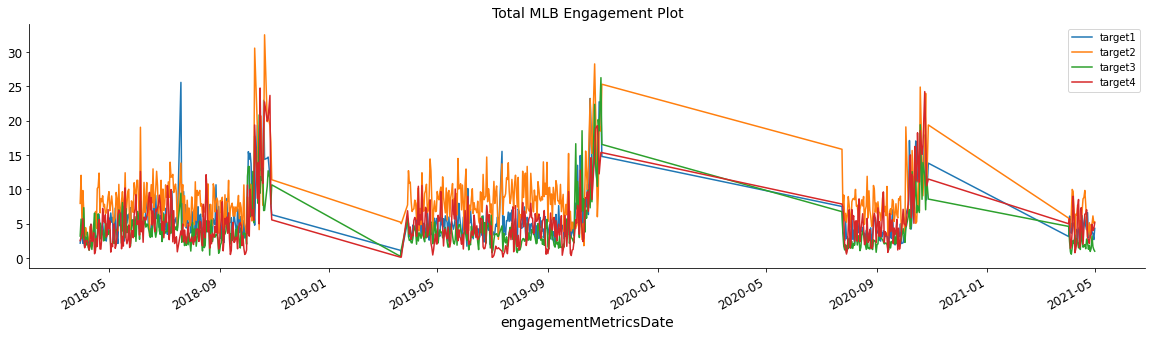

In [20]:
df_engagementplot = df[['engagementMetricsDate','target1','target2','target3','target4']]
target_date = df_engagementplot.groupby('engagementMetricsDate').mean()
target_date.plot(figsize=(20,5))
plt.title("Total MLB Engagement Plot")

Text(0.5, 1.0, 'America League Engagement Plot')

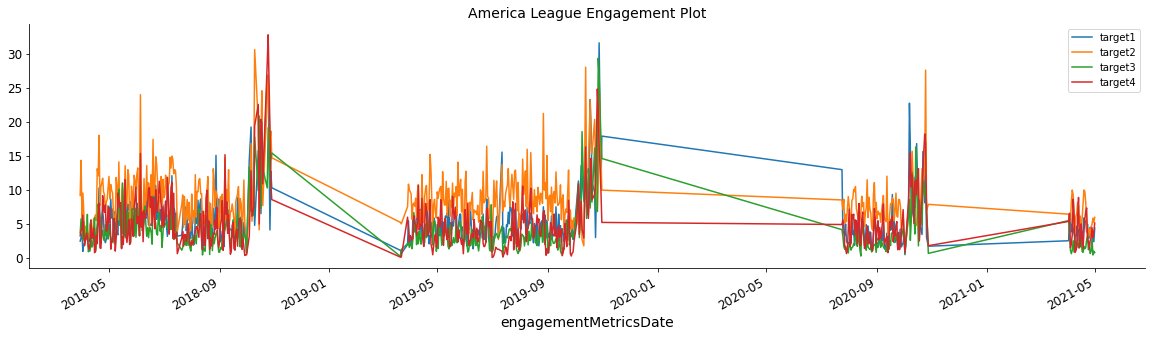

In [21]:
df_engagementplot_AL = df.loc[df['leagueName'] == 'American League', ['engagementMetricsDate','target1','target2','target3','target4']]
target_date_al = df_engagementplot_AL.groupby('engagementMetricsDate').mean()
target_date_al.plot(figsize=(20,5))
plt.title("America League Engagement Plot")

Text(0.5, 1.0, 'National League Engagement Plot')

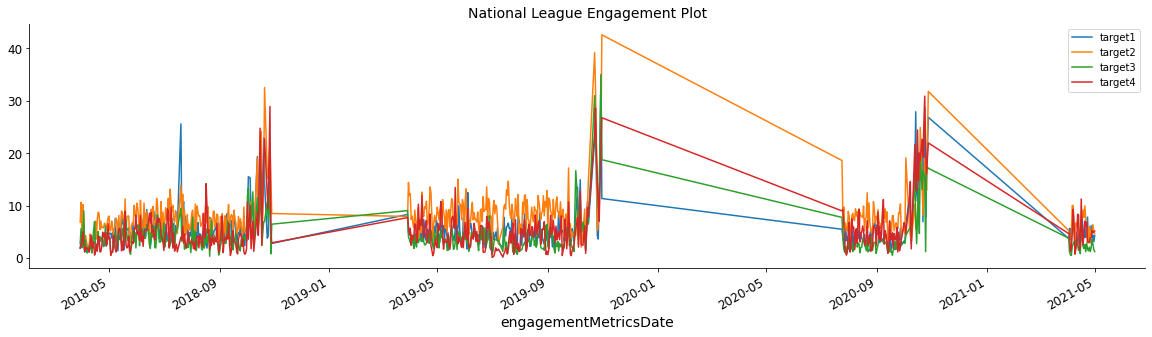

In [22]:
df_engagementplot_NL = df.loc[df['leagueName'] == 'National League', ['engagementMetricsDate','target1','target2','target3','target4']]
target_date_nl = df_engagementplot_NL.groupby('engagementMetricsDate').mean()
target_date_nl.plot(figsize=(20,5))
plt.title("National League Engagement Plot")

Text(0.5, 1.0, 'Major Market Engagement Plot')

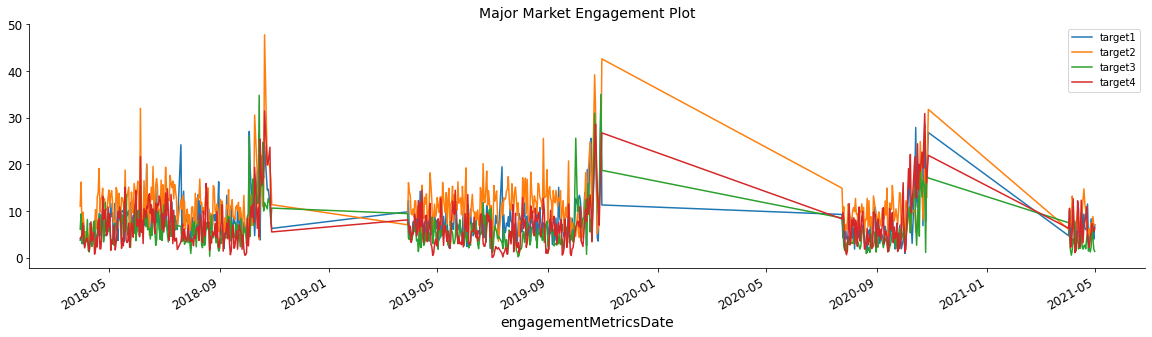

In [23]:
df_engagementplot_mk = df.loc[df['majormarket'] == 1, ['engagementMetricsDate','target1','target2','target3','target4']]
target_date_mk = df_engagementplot_mk.groupby('engagementMetricsDate').mean()
target_date_mk.plot(figsize=(20,5))
plt.title("Major Market Engagement Plot")

### Model Prep

In [24]:
# Feature Scaling

categorical_vars = ['leagueName', 'divisionName']

discrete_vars = ['flyOuts',
 'groundOuts',
 'runsScored',
 'doubles',
 'triples',
 'homeRuns',
 'strikeOuts',
 'baseOnBalls',
 'intentionalWalks',
 'hits',
 'hitByPitch',
 'atBats',
 'caughtStealing',
 'stolenBases',
 'groundIntoDoublePlay',
 'groundIntoTriplePlay',
 'plateAppearances',
 'totalBases',
 'rbi',
 'leftOnBase',
 'sacBunts',
 'sacFlies',
 'catchersInterference',
 'pickoffs',
 'assists',
 'putOuts',
 'errors',
 'chances','numberOfFollowers','Batting_Average_on_Balls_in_Play_BABIP',
 'Isolated_Power_ISO',
 'Runs_Created_RC']

binaryprocessed_var = ['majormarket', 'pre_season',
 'all_star_game',
 'regular_season',
 'post_season',
 'awardachieved']

target1 = ['target1']
target2 = ['target2']
target3 = ['target3']
target4 = ['target4']

In [25]:
# Categorical - impute, one hot encode
#cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='Other'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical - impute, scale
#num_si_step = ('si', SimpleImputer(strategy='median'))
#num_scl_step = ('scl', MinMaxScaler())
num_scl_step = ('scl', StandardScaler())
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars)]

In [26]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + discrete_vars + binaryprocessed_var])
X = ct.transform(df[categorical_vars + discrete_vars + binaryprocessed_var])

y1 = df[['target1']].values
y2 = df[['target2']].values
y3 = df[['target3']].values
y4 = df[['target4']].values

In [27]:
X = df[['flyOuts',
 'groundOuts',
 'runsScored',
 'doubles',
 'triples',
 'homeRuns',
 'strikeOuts',
 'baseOnBalls',
 'intentionalWalks',
 'hits',
 'hitByPitch',
 'atBats',
 'caughtStealing',
 'stolenBases',
 'groundIntoDoublePlay',
 'groundIntoTriplePlay',
 'plateAppearances',
 'totalBases',
 'rbi',
 'leftOnBase',
 'sacBunts',
 'sacFlies',
 'catchersInterference',
 'pickoffs',
 'assists',
 'putOuts',
 'errors',
 'chances','numberOfFollowers','Batting_Average_on_Balls_in_Play_BABIP',
 'Isolated_Power_ISO',
 'Runs_Created_RC','American_League', 'National_League', 'majormarket', 'pre_season',
 'all_star_game',
 'regular_season',
 'post_season',
 'awardachieved']]

target1 = df['target1']
target2 = df['target2']
target3 = df['target3']
target4 = df['target4']
targetmean_df = df[['target1', 'target2', 'target3', 'target4']]
targetmean = targetmean_df.mean(axis=1)

### Engagement Target Feature Importance

In [36]:
# XGB Boost Regressor for Model

model_target1 = xgb.XGBRegressor().fit(X, target1)
model_target2 = xgb.XGBRegressor().fit(X, target2)
model_target3 = xgb.XGBRegressor().fit(X, target3)
model_target4 = xgb.XGBRegressor().fit(X, target4)
model_mean = xgb.XGBRegressor().fit(X, targetmean)

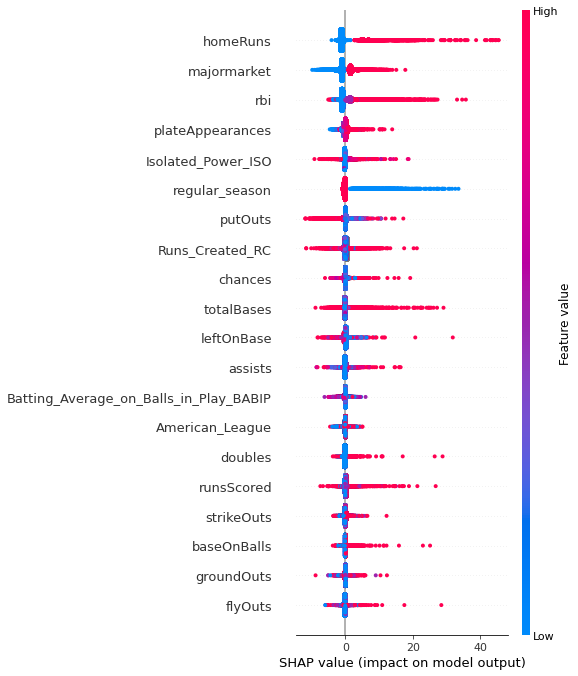

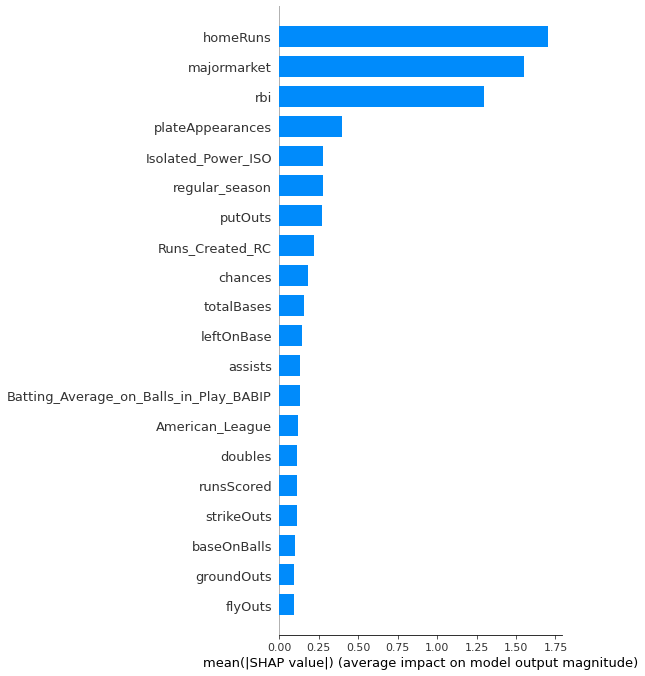

In [29]:
# Shap Plot for Target 1

ex = shap.TreeExplainer(model_target1)
shap_values = ex.shap_values(X)
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar')
#plt.title("Engagement Target1 Feature Shap Plot")
plt.show()

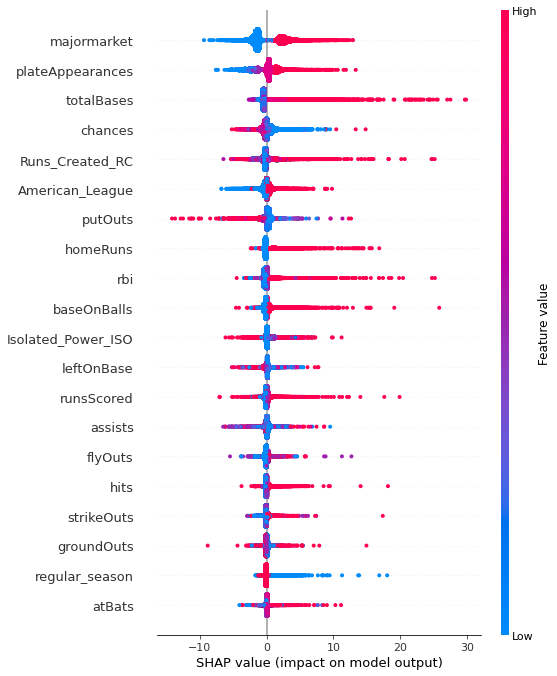

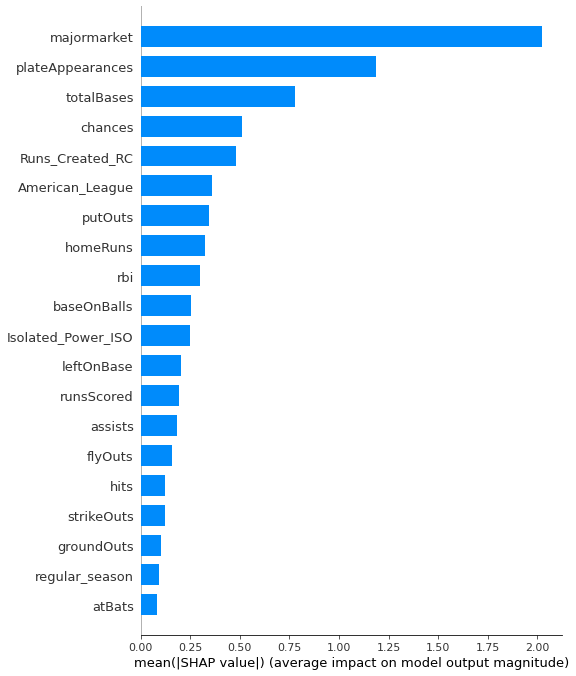

In [30]:
# Shap Plot for Target 2

ex = shap.TreeExplainer(model_target2)
shap_values = ex.shap_values(X)
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar')
plt.show()

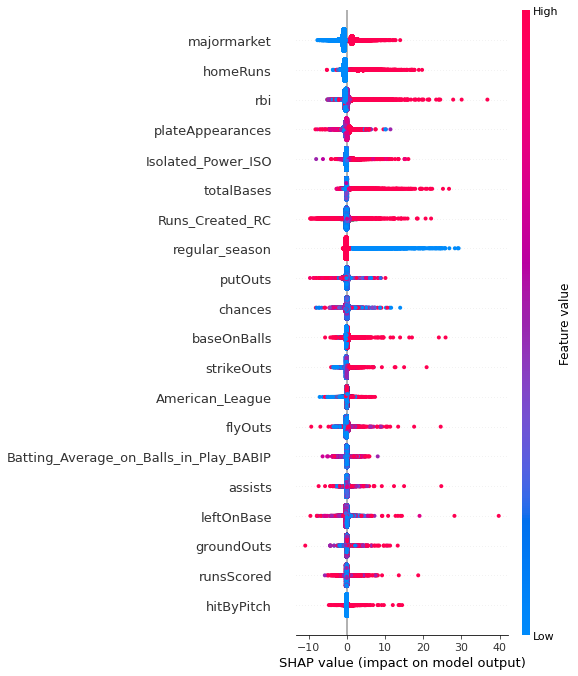

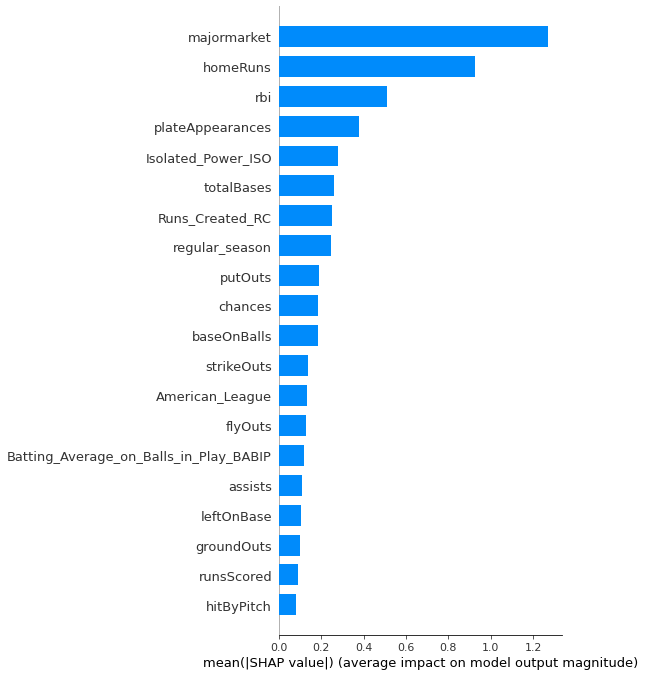

In [31]:
# Shap Plot for Target 3

ex = shap.TreeExplainer(model_target3)
shap_values = ex.shap_values(X)
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar')
plt.show()

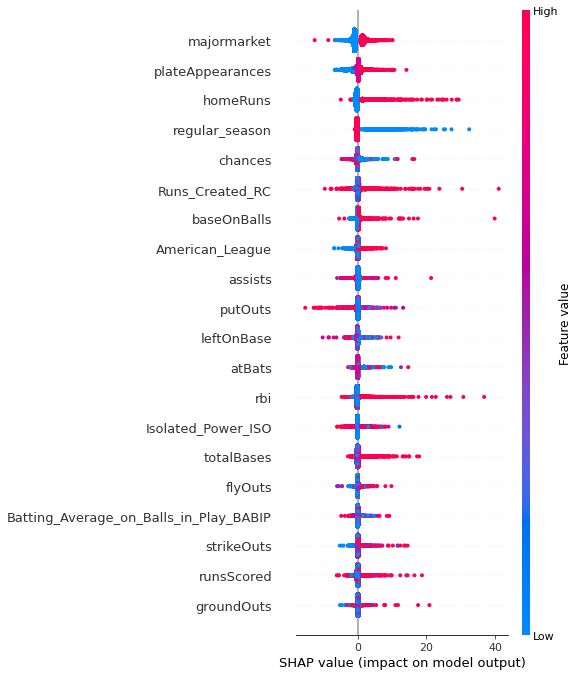

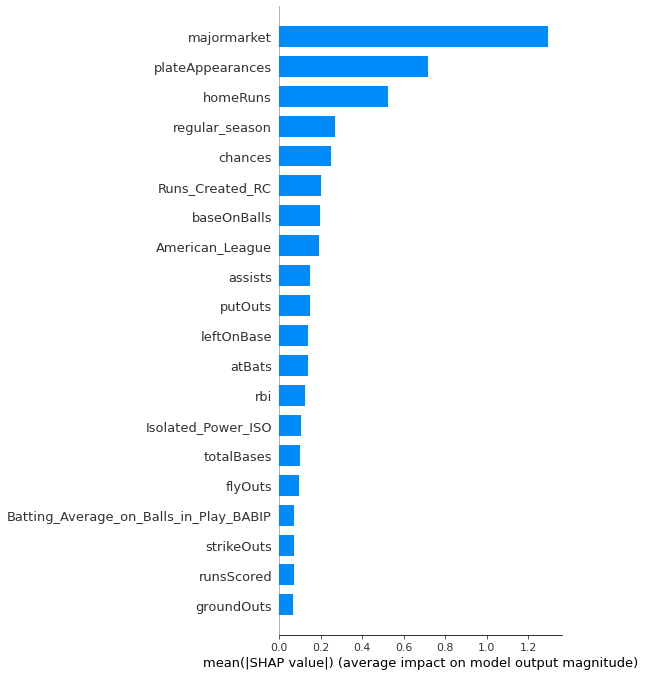

In [32]:
# Shap Plot for Target 4

ex = shap.TreeExplainer(model_target4)
shap_values = ex.shap_values(X)
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar')
plt.show()

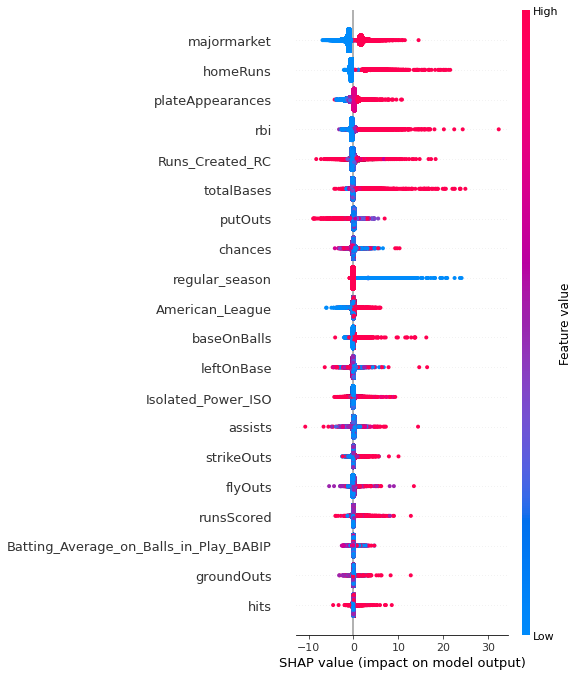

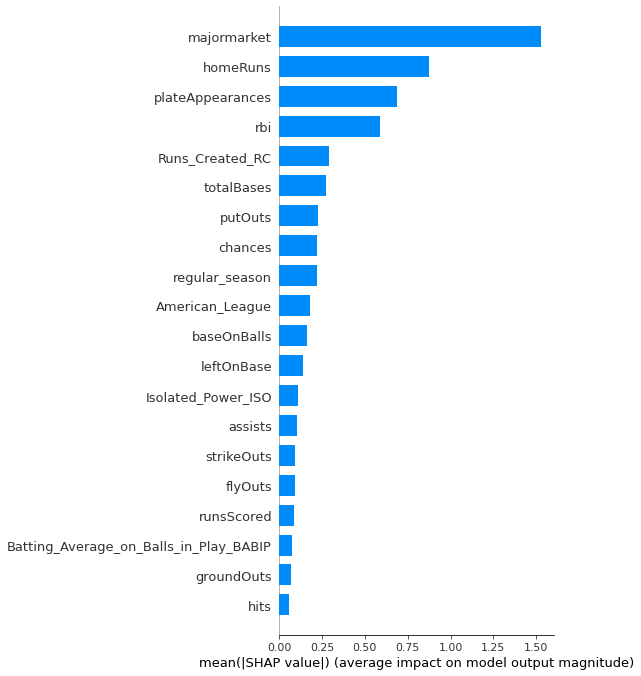

In [33]:
# Shap Plot for Target Mean

ex = shap.TreeExplainer(model_mean)
shap_values = ex.shap_values(X)
shap.summary_plot(shap_values, X)
shap.summary_plot(shap_values, X, plot_type='bar')
plt.show()